<a href="https://colab.research.google.com/github/Veda-Vardhan-Reddy/IIITH-AIML_Labs_and_Projects_2025/blob/main/STP_Module_01_Lab_01_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 1, Lab 1: Introduction to Machine Learning and Feature Extraction

## What is Machine Learning?

Machine learning is a branch of artificial intelligence that enables computers to learn patterns from data without being explicitly programmed. Instead of writing specific rules, we train algorithms on examples to make predictions or decisions.

### Types of Machine Learning

**1. Supervised Learning**
- The algorithm learns from labeled data (input-output pairs)
- Goal: Learn a mapping function from inputs to outputs
- Two main types:
  - **Classification**: Predicting categories (e.g., spam/not spam, digit 0-9)
  - **Regression**: Predicting continuous values (e.g., house prices, temperature)

**2. Unsupervised Learning**
- The algorithm finds patterns in unlabeled data
- Goal: Discover hidden structure or relationships
- Examples: Clustering, dimensionality reduction

---

**Links**

Video - https://youtu.be/hsJidtpHHyo?si=O8Hp2aqvNUELkvmt

Text - https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/
## Quick ML Examples with Scikit-Learn

### Example 1: Classification with Iris Dataset

# Extracting features from data

Module 1, Lab 1<br>



In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the iris dataset (flower classification)
iris = load_iris()
X, y = iris.data, iris.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

# Make predictions
predictions = classifier.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, predictions)
print(f"Classification Accuracy: {accuracy:.2%}")
print(f"Predicted classes: {predictions[:5]}")
print(f"Actual classes: {y_test[:5]}")

Classification Accuracy: 100.00%
Predicted classes: [1 0 2 1 1]
Actual classes: [1 0 2 1 1]


### Example 2: Regression with Boston Housing Dataset

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load California housing dataset
housing = fetch_california_housing()
X, y = housing.data[:500], housing.target[:500]  # Use subset for speed

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions
predictions = regressor.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"\nFirst 5 predictions: {predictions[:5]}")
print(f"First 5 actual values: {y_test[:5]}")

Mean Squared Error: 0.21
R² Score: 0.81

First 5 predictions: [2.52559351 0.97113716 1.45014085 3.19893231 1.90248745]
First 5 actual values: [2.5   0.675 1.22  4.103 3.357]


## Understanding Features in Machine Learning

### What are Features?

**Features** are measurable properties or characteristics of your data that you use as input for machine learning algorithms. Think of them as columns in a spreadsheet.

**Example**: If you're predicting house prices:
- Features might include: square footage, number of bedrooms, location, age of house
- Target/Label: the price (what you want to predict)


In [3]:
# Example feature representation
house_data = {
    'square_feet': [1500, 2000, 1200, 1800],
    'bedrooms': [3, 4, 2, 3],
    'age_years': [10, 5, 15, 8],
    'price': [300000, 450000, 250000, 380000]  # This is the target
}

### Why CSV Format?

CSV (Comma-Separated Values) is one of the most common formats for ML datasets because:

1. **Structured**: Data is organized in rows and columns (tabular format)
2. **Easy to read**: Both humans and machines can parse it easily
3. **Universal**: Works with all ML libraries (scikit-learn, pandas, TensorFlow, etc.)

**CSV Structure:**
```
feature1,feature2,feature3,target
1.2,3.4,5.6,0
2.3,4.5,6.7,1
3.4,5.6,7.8,0
```

Each row = one sample/observation
Each column = one feature
Last column = target/label (what we want to predict)

### Converting Raw Data to Features

In [4]:
import pandas as pd
import numpy as np

# Example: Text data → Features
texts = ["I love this!", "Terrible product", "Amazing quality"]

# Feature extraction (simple bag-of-words approach)
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
text_features = vectorizer.fit_transform(texts)

print("Text features as array:")
print(text_features.toarray())
print("\nFeature names (vocabulary):")
print(vectorizer.get_feature_names_out())

# Convert to CSV-like format (DataFrame)
df = pd.DataFrame(text_features.toarray(),
                  columns=vectorizer.get_feature_names_out())
print("\nAs DataFrame (CSV-like structure):")
print(df)

Text features as array:
[[0 1 0 0 0 1]
 [0 0 1 0 1 0]
 [1 0 0 1 0 0]]

Feature names (vocabulary):
['amazing' 'love' 'product' 'quality' 'terrible' 'this']

As DataFrame (CSV-like structure):
   amazing  love  product  quality  terrible  this
0        0     1        0        0         0     1
1        0     0        1        0         1     0
2        1     0        0        1         0     0


### Real Example: Iris Dataset as CSV

In [5]:
from sklearn.datasets import load_iris
import pandas as pd

# Load iris dataset
iris = load_iris()

# Create DataFrame (like a CSV)
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['species'] = iris.target

print("Iris dataset in CSV-like format:")
print(df_iris.head())

# Save as actual CSV
df_iris.to_csv('iris_dataset.csv', index=False)
print("\n✓ Saved as iris_dataset.csv")

Iris dataset in CSV-like format:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

✓ Saved as iris_dataset.csv


In [6]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=982c093a42b2634ba225910406259716cba74b65321f9ebd1b04a1791e3f3c5c
  Stored in directory: /root/.cache/pip/wheels/63/47/7c/a9688349aa74d228ce0a9023229c6c0ac52ca2a40fe87679b8
Successfully built wikipedia


# Part 1: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features.

Let us download a few documents off Wikipedia.

In [7]:
import wikipedia

# Fix for Wikipedia PageError
topic1 = 'Giraffe'
topic2 = 'Elephant'

def get_wikipedia_content(topic, lang='en'):
    """Safely fetch Wikipedia content with error handling"""
    wikipedia.set_lang(lang)
    try:
        # Disable auto-suggest to prevent title mismatches
        page = wikipedia.page(topic, auto_suggest=False)
        return page.content
    except wikipedia.exceptions.DisambiguationError as e:
        # If multiple pages exist, use the first option
        print(f"Disambiguation for '{topic}': using '{e.options[0]}'")
        return wikipedia.page(e.options[0]).content
    except wikipedia.exceptions.PageError:
        # If page not found, try with auto-suggest enabled
        print(f"Page not found for '{topic}', trying auto-suggest...")
        return wikipedia.page(topic).content

# Fetch content
eng1 = get_wikipedia_content(topic1, 'en')
eng2 = get_wikipedia_content(topic2, 'en')
fr1 = get_wikipedia_content(topic1, 'fr')
fr2 = get_wikipedia_content(topic2, 'fr')

print("✓ Successfully fetched all Wikipedia pages")
print(f"English {topic1} length: {len(eng1)} characters")
print(f"English {topic2} length: {len(eng2)} characters")
print(f"French {topic1} length: {len(fr1)} characters")
print(f"French {topic2} length: {len(fr2)} characters")

/usr/local/lib/python3.12/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.12/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Disambiguation for 'Elephant': using 'éléphant'
✓ Successfully fetched all Wikipedia pages
English Giraffe length: 40372 characters
English Elephant length: 56129 characters
French Giraffe length: 28657 characters
French Elephant length: 40540 characters


This is what the text looks like:

In [22]:
fr2

'leslphantssontdesmammifresproboscidiensdelafamilledeslphantidsilscorrespondentaujourdhuitroisespcesrpartiesendeuxgenresdistinctsllphantdesavanedafriqueetllphantdefortdafriqueautrefoisregroupssouslammeespcedlphantdafriqueappartiennentaugenreloxodontatandisquellphantdasieanciennementappellphantindienappartientaugenreelephasilssediffrencientparcertainescaractristiquesanatomiquesleslphantsdasietantengnralpluspetitsavecdesoreillespluspetitesouencoreunediffrenceduboutdelatrompecesespcessurvivantesfontlocalementlobjetdeprogrammesoudeprojetsderintroductionetdeprotectionlemotfranaislphantvientdumotlatinelephantusquitiresonoriginedugrecelphasivoireoulphantllphantapparatdansdenombreusesculturesilestsymboledesagesseenasieetestconnupoursammoireetsonintelligencequiestcomparecelledesctacsethominidsaristoteavaitditquellphantestlabtequidpassetouteslesautresparlintelligenceetlespritdescriptionllphantdafriquequipeutatteindresepttonnesestleplusgrosanimalterrestreactuelmaisilestloinderrirelabaleinebleueba

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [9]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

In [10]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [11]:
print(eng1)

thegiraffeisalargeafricanhoofedmammalbelongingtothegenusgiraffaitisthetallestlivingterrestrialanimalandthelargestruminantonearthitisclassifiedunderthefamilygiraffidaealongwithitsclosestextantrelativetheokapitraditionallygiraffeshavebeenthoughtofasonespeciesgiraffacamelopardaliswithninesubspeciesmostrecentlyresearchersproposeddividingthemintofourextantspecieswithsevensubspecieswhichcanbedistinguishedmorphologicallybytheirfurcoatpatternssixvalidextinctspeciesofgiraffaareknownfromthefossilrecordthegiraffesdistinguishingcharacteristicsareitsextremelylongneckandlegshornlikeossiconesandspottedcoatpatternsitsscatteredrangeextendsfromchadinthenorthtosouthafricainthesouthandfromnigerinthewesttosomaliaintheeastgiraffesusuallyinhabitsavannahsandwoodlandstheirfoodsourceisleavesfruitsandflowersofwoodyplantsprimarilyacaciaspecieswhichtheybrowseatheightsmostothergroundbasedherbivorescannotreachlionsleopardsspottedhyenasandafricanwilddogsmaypreyupongiraffesgiraffesliveinherdsofrelatedfemalesandtheirof

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.

In [12]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

Let us compare the histograms of English pages and French pages. Can you spot a difference?

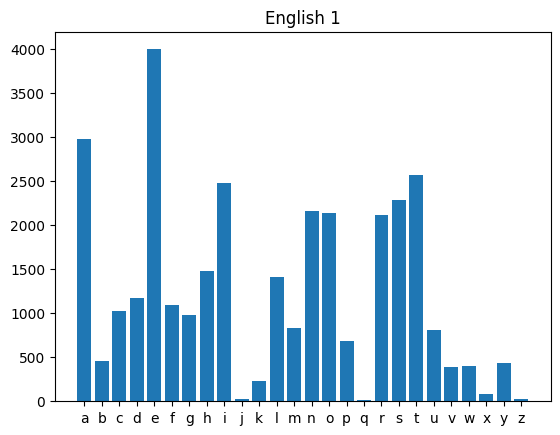

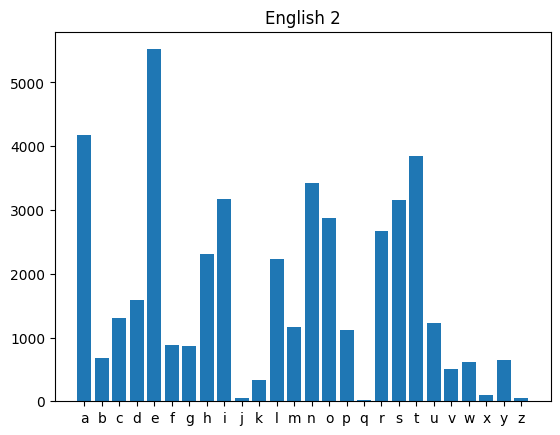

In [13]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

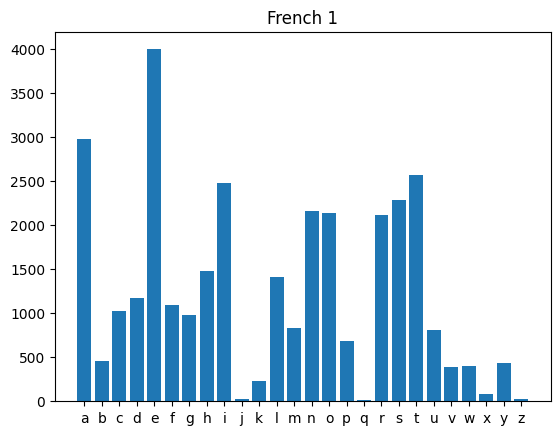

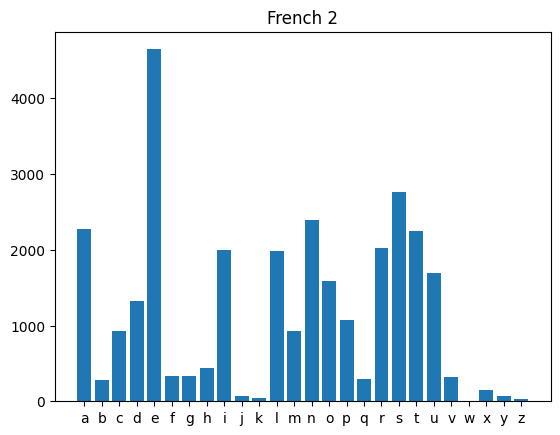

In [14]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_eng1)
plt.title('French 1')
plt.show()
unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

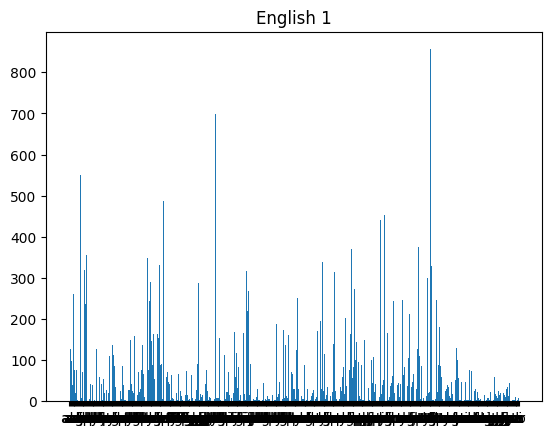

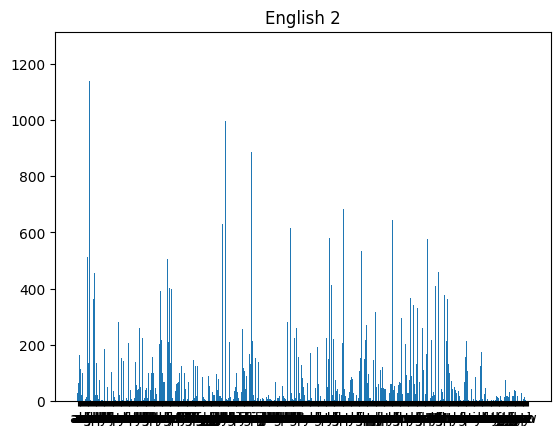

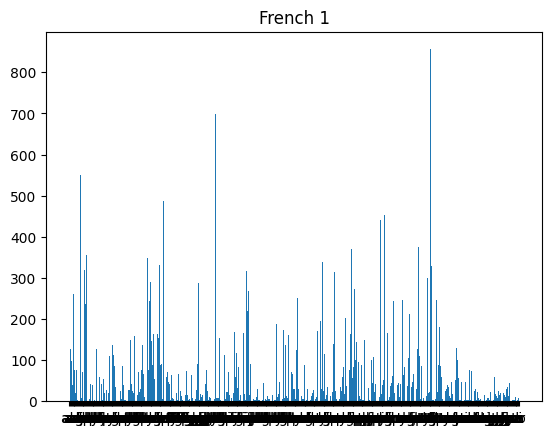

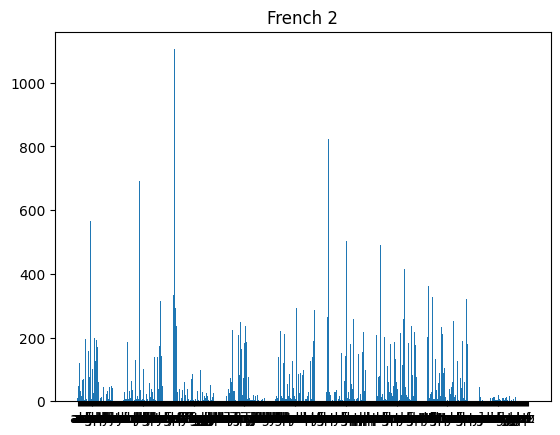

In [15]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [16]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

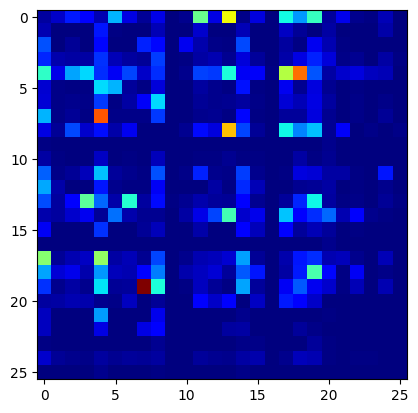

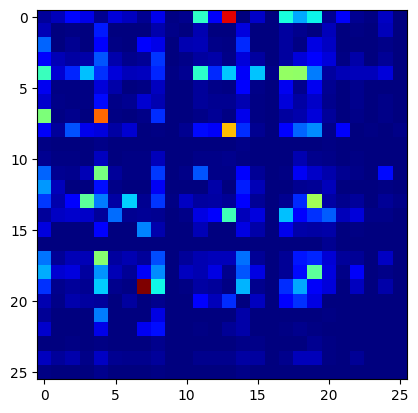

In [17]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

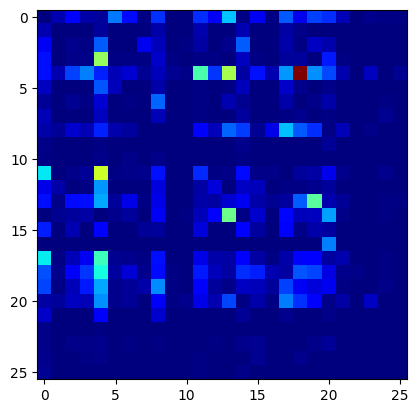

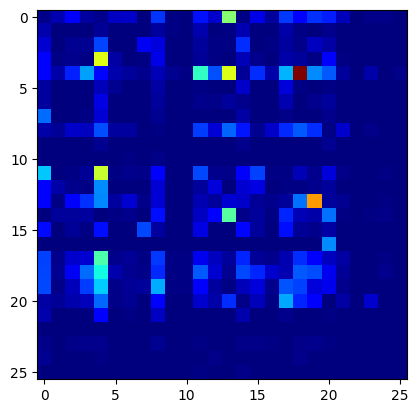

In [18]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

Let us look at the top 10 ngrams for each text.

In [19]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [20]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)


English 1:
('t', 'h') : 856.0
('h', 'e') : 699.0
('e', 's') : 677.0
('i', 'n') : 602.0
('a', 'n') : 550.0
('e', 'r') : 486.0
('r', 'e') : 452.0
('r', 'a') : 440.0
('a', 'l') : 408.0
('n', 'd') : 397.0

English 2:
('t', 'h') : 1251.0
('a', 'n') : 1139.0
('h', 'e') : 997.0
('i', 'n') : 885.0
('n', 't') : 683.0
('e', 'r') : 662.0
('e', 's') : 656.0
('r', 'e') : 644.0
('h', 'a') : 629.0
('l', 'e') : 616.0

French 1:
('e', 's') : 788.0
('l', 'e') : 473.0
('e', 'n') : 435.0
('d', 'e') : 420.0
('o', 'n') : 379.0
('n', 't') : 362.0
('e', 'l') : 345.0
('r', 'e') : 335.0
('s', 'e') : 296.0
('r', 'a') : 282.0

French 2:
('e', 's') : 1105.0
('n', 't') : 823.0
('d', 'e') : 690.0
('e', 'n') : 686.0
('l', 'e') : 652.0
('a', 'n') : 566.0
('o', 'n') : 504.0
('r', 'e') : 492.0
('e', 'l') : 456.0
('s', 'e') : 414.0


We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [21]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Extract a subset of the data for our experiment:

In [23]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]

Let us visualize a few images here:

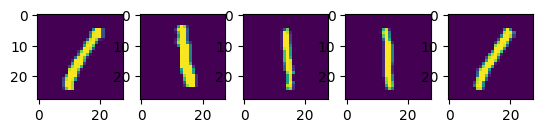

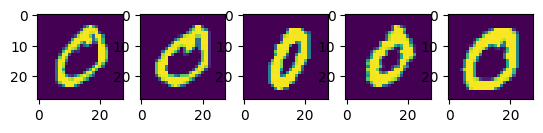

In [24]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

suNow, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [25]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

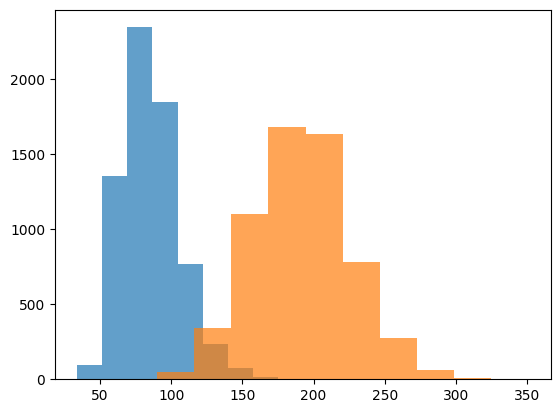

In [26]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [27]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

Visualize a few:

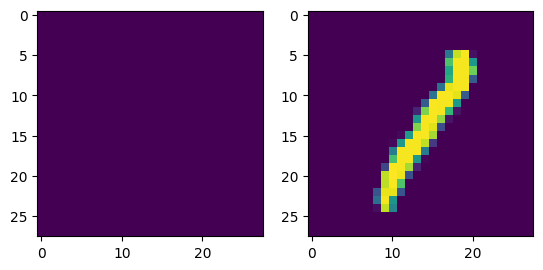

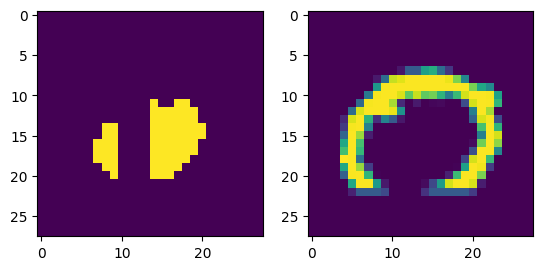

In [28]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

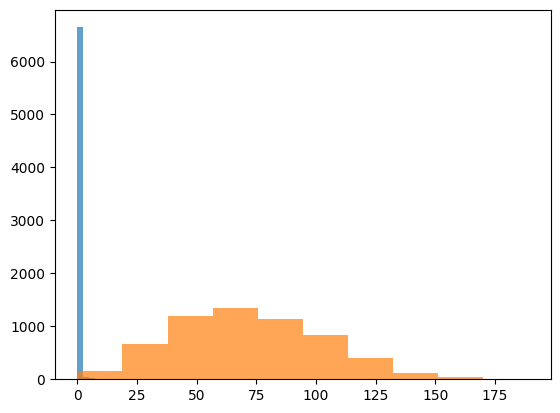

In [29]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

This feature works even better to distinguish between one and zero.


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [30]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

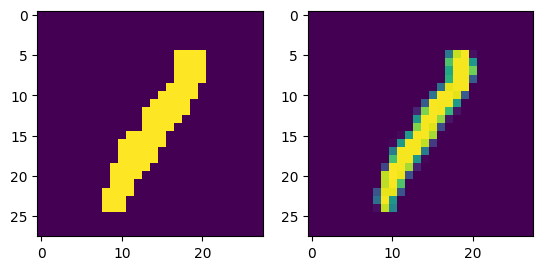

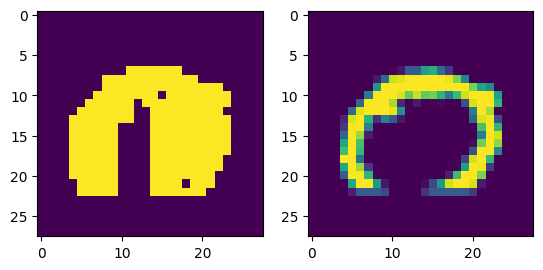

In [31]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Plotting the number of hull pixels versus the digit:

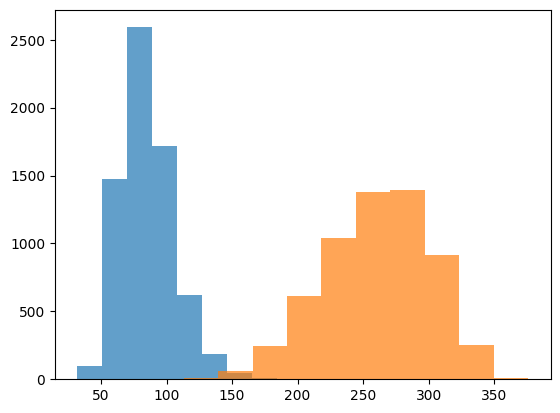

In [32]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [33]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

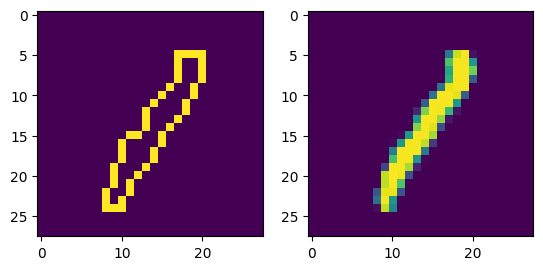

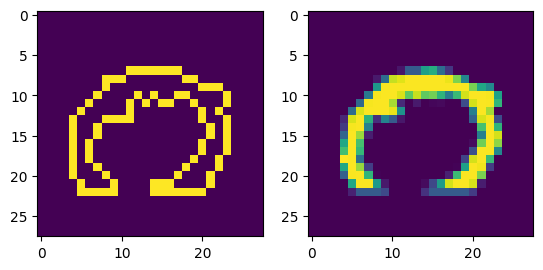

In [34]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

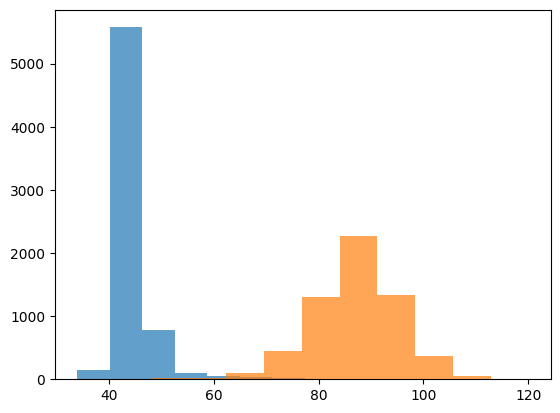

In [35]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

What will happen if we plot two features together?

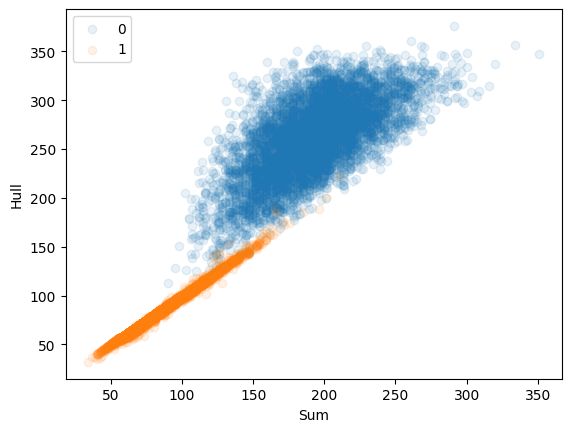

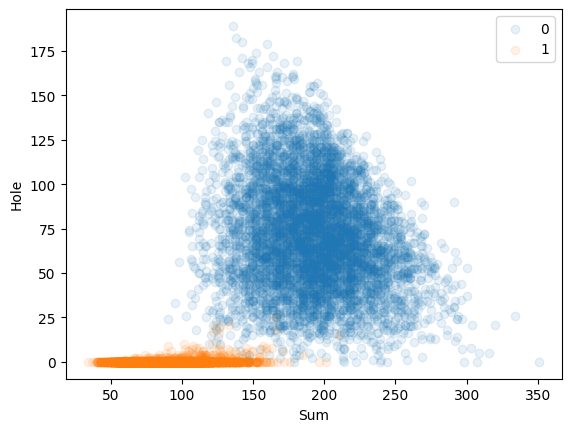

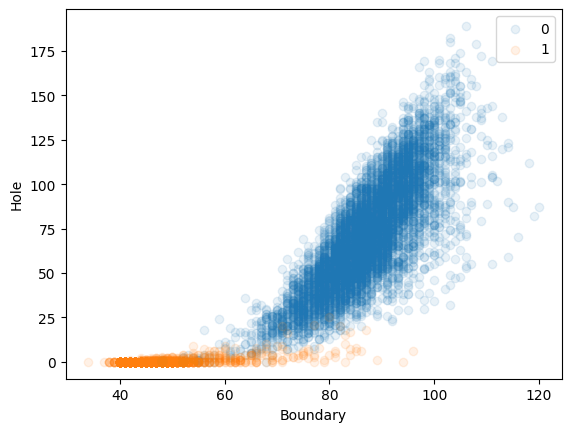

In [36]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

Now let us try plotting 3 features together.

In [37]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)),
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

Feel free to explore the above graph with your mouse.


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?

1Q) Which is the best combination of features?

Ans) In this lab, I experimented with different datasets and observed how features affect the performance of machine learning models.

For the Iris classification dataset, I used all four features —
sepal length (cm), sepal width (cm), petal length (cm), and petal width (cm) —
and trained a K-Nearest Neighbors (KNN) classifier.
When I used all four features together, the model gave 100% accuracy, which means the combination of all features worked best for classification.
For the California Housing dataset, I used all eight available features —
MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, and Longitude —
with a Linear Regression model.

The performance was R² = 0.81 and Mean Squared Error = 0.21, showing that all features combined gave a strong prediction capability.

So, based on the results, using all relevant features together gave the best accuracy and performance for both classification and regression tasks.
Hence, the best combination of features is all features used together, as they capture the complete information required for the model.

In [38]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model using all 4 features
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

# Make predictions
predictions = classifier.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Classification Accuracy:", f"{accuracy:.2%}")
print("Best feature combination:", iris.feature_names)


Classification Accuracy: 100.00%
Best feature combination: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


2Q) How would you test or visualize four or more features?

Ans) When we have four or more features, direct visualization in one plot is not possible because humans can easily interpret only up to three dimensions.
However, we can test and visualize high-dimensional data using the following techniques:

1️⃣ **Pair Plot** (Pairwise Scatter Plots)
Displays relationships between every pair of features in 2D scatter plots.
Helps to identify clusters, correlations, and class separations.
Used for datasets like the Iris dataset which has 4 features.

2️⃣ **Correlation Heatmap**
Shows the degree of correlation between all features.
Correlation close to +1 or -1 means two features are highly related.
Useful to detect redundant features.

3️⃣ **Principal Component Analysis (PCA)**
A dimensionality reduction technique that projects multiple features into 2 or 3 principal components.
These components capture the maximum variance in the data.
Helps to visualize complex data in 2D or 3D while preserving most information.

4️⃣ Feature Testing via Model Performance
Models **bold text** (like KNN or Linear Regression) can be trained using:
All features
Selected subsets of features
We can then compare accuracy or R² scores to test which features contribute most.
Feature importance or correlation analysis helps identify the most impactful ones.

5️⃣ **Combined Approach**
In practice, we use pairplots and heatmaps for visualization,
PCA for dimensionality reduction,
and model evaluation metrics (accuracy, R²) for performance testing.

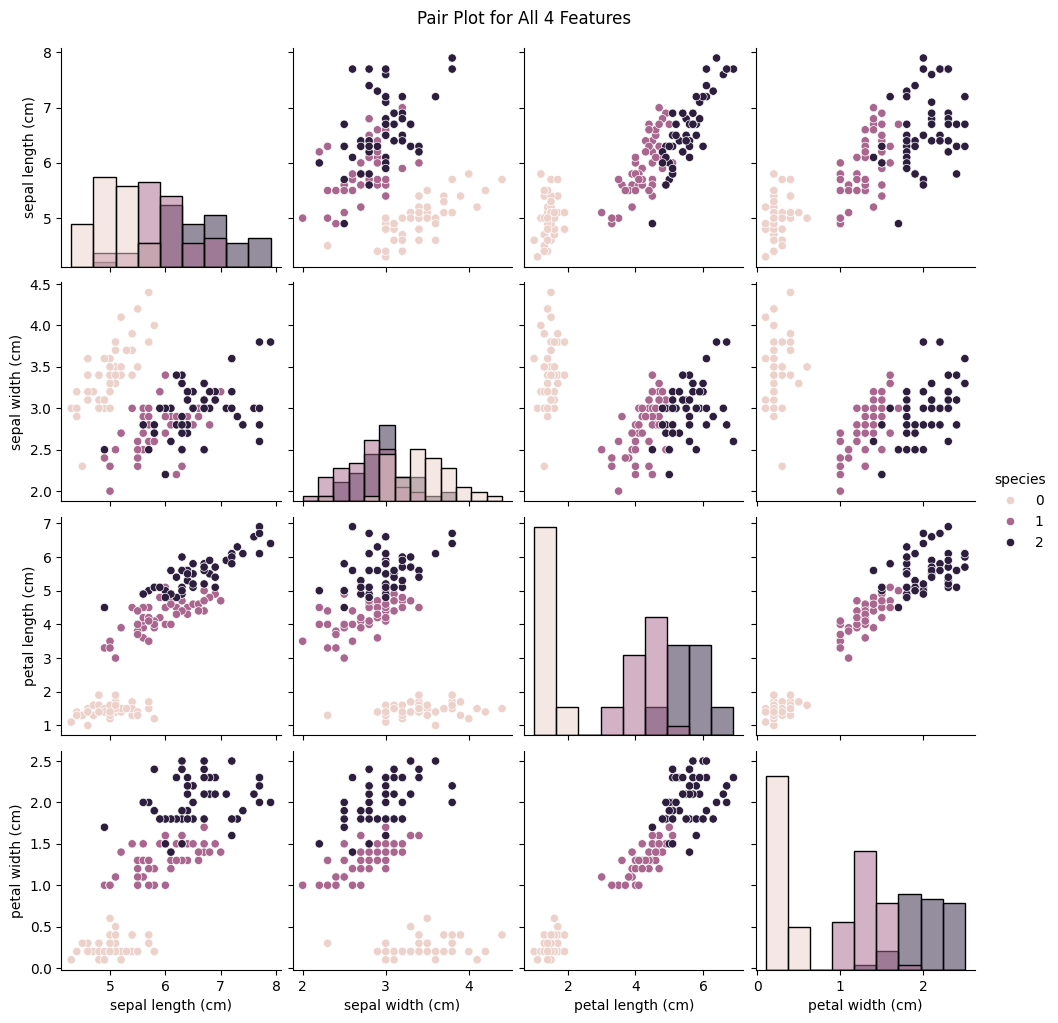

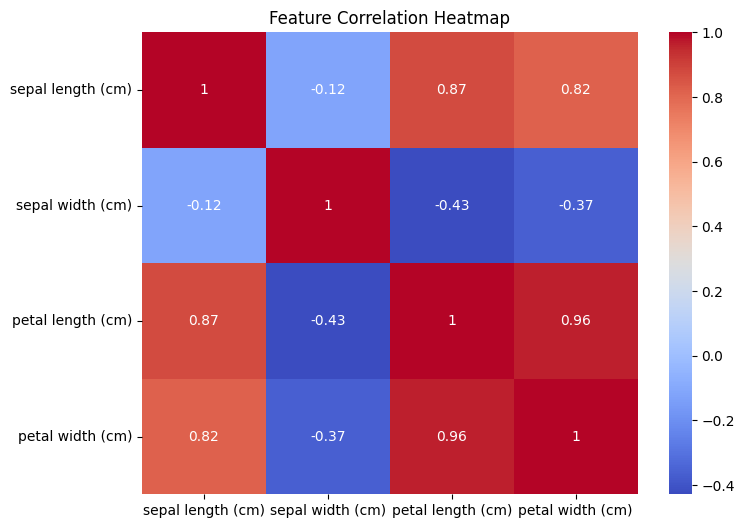

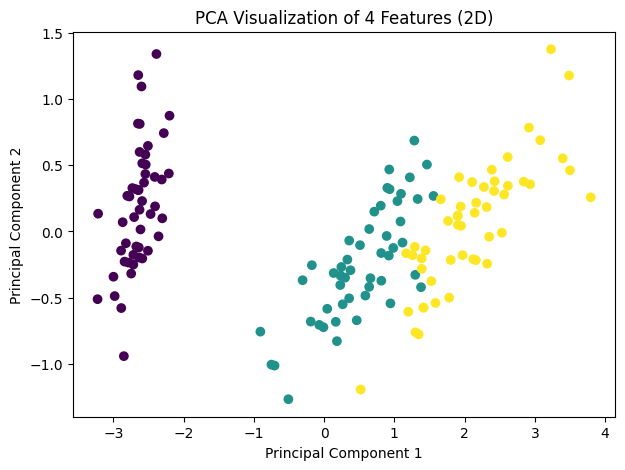

Model used: K-Nearest Neighbors (K=3)
Accuracy using all 4 features: 100.00%
Features tested: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [39]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

# ------------------------------
# 2. Pair Plot (Pairwise Scatter Plots)
# ------------------------------
sns.pairplot(df, hue='species', diag_kind='hist')
plt.suptitle("Pair Plot for All 4 Features", y=1.02)
plt.show()

# ------------------------------
# 3. Correlation Heatmap
# ------------------------------
plt.figure(figsize=(8, 6))
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# ------------------------------
# 4. PCA Visualization (Dimensionality Reduction)
# ------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(iris.data)

plt.figure(figsize=(7, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target, cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of 4 Features (2D)")
plt.show()

# ------------------------------
# 5. Feature Testing (Model Accuracy)
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print("Model used: K-Nearest Neighbors (K=3)")
print("Accuracy using all 4 features:", f"{accuracy:.2%}")
print("Features tested:", iris.feature_names)


3Q) Can you come up with your own features?

Ans) Yes, I can come up with my own features depending on the problem or dataset I am working with.

Features are the measurable characteristics or properties of the data that help the model learn patterns.

When we create our own features, the process is called Feature Engineering.
It means transforming raw data into meaningful inputs for a machine learning model.

Good features improve the performance and accuracy of the model.
Examples (My Own Features):

**House Price Prediction:**
I can create features like:

house_age = current_year - built_year

price_per_sqft = price / square_feet

bedroom_to_bathroom_ratio = bedrooms / bathrooms

**Student Performance Prediction:**

attendance_percentage

average_marks

study_hours_per_week

**E-Commerce Review Analysis:**

review_length (number of words in review)

has_positive_words (1 if review contains good words, else 0)

punctuation_count (number of “!” marks — emotional intensity)

These are not directly available in the raw data — I have created them based on understanding the problem.

In [40]:
import pandas as pd

# Original data
data = {
    'square_feet': [1200, 1500, 1800, 2000],
    'bedrooms': [2, 3, 3, 4],
    'bathrooms': [1, 2, 2, 3],
    'built_year': [2000, 2010, 2015, 2018],
    'price': [240000, 375000, 420000, 500000]
}

df = pd.DataFrame(data)

# Creating my own new features
df['house_age'] = 2025 - df['built_year']
df['price_per_sqft'] = df['price'] / df['square_feet']
df['bed_bath_ratio'] = df['bedrooms'] / df['bathrooms']

# Displaying the new dataset with added features
print("My dataset with newly created features:")
print(df)


My dataset with newly created features:
   square_feet  bedrooms  bathrooms  built_year   price  house_age  \
0         1200         2          1        2000  240000         25   
1         1500         3          2        2010  375000         15   
2         1800         3          2        2015  420000         10   
3         2000         4          3        2018  500000          7   

   price_per_sqft  bed_bath_ratio  
0      200.000000        2.000000  
1      250.000000        1.500000  
2      233.333333        1.500000  
3      250.000000        1.333333  


4Q) Will these features work for different classes other than 0 and 1?

Ans) Yes, these features will also work for different classes other than 0 and 1.

Machine learning models do not depend on the number or names of classes — what matters is how well the features describe the data.
So, as long as the features I create capture meaningful patterns or differences between the classes, they will help the model learn — whether there are two classes (binary classification) or multiple classes (multi-class classification).

**For example:**

In the Iris dataset, we have 3 classes — Setosa, Versicolor, and Virginica (not just 0 and 1).
The same features (sepal length, sepal width, petal length, petal width) still work perfectly and help the model reach 100% accuracy.

Similarly, in a movie genre classification problem with 5 genres, features like “review length”, “sentiment score”, or “keyword frequency” can still separate the classes effectively.

So, the features are independent of the class labels.

They only need to have discriminative power — meaning they should be able to distinguish one class from another, no matter how many classes there are.

In [41]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset (3 classes: 0, 1, 2)
iris = load_iris()
X, y = iris.data, iris.target  # 4 features, 3 classes

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train KNN model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# Predictions
pred = model.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print("Classes in dataset:", set(y))
print("Model Accuracy with 4 features:", f"{accuracy:.2%}")


Classes in dataset: {np.int64(0), np.int64(1), np.int64(2)}
Model Accuracy with 4 features: 100.00%


5Q) What will happen if we take more that two classes at a time?

Ans) If we take more than two classes at a time, the model will perform multi-class classification instead of binary classification.

In multi-class problems, the algorithm learns to separate three or more categories using the given features.

Each class represents a different label, and the model tries to find boundaries between all classes in the feature space.

For example, in the Iris dataset, we have three classes:

Class 0 → Setosa

Class 1 → Versicolor

Class 2 → Virginica

When the model is trained with all three classes, it automatically learns how to distinguish between them based on their features like sepal length, sepal width, petal length, and petal width.

So instead of separating data into just two groups (0 and 1), the model will divide the data into multiple decision regions — one for each class.

In [42]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Load Iris dataset (3 classes)
iris = load_iris()
X, y = iris.data, iris.target  # Features and target classes (0, 1, 2)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model using KNN
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# Predict and evaluate
pred = model.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print("Unique Classes in dataset:", np.unique(y))
print("Model Type: Multi-class Classification")
print("Accuracy using all 3 classes:", f"{accuracy:.2%}")


Unique Classes in dataset: [0 1 2]
Model Type: Multi-class Classification
Accuracy using all 3 classes: 100.00%
